## Replication of <*Cultural Transmission, Disproportionate Prior Exposure, and the Evolution of Cooperation*> by 六月初四

**Date: 2021/08/27**

**Author: Sheng Fu, Wang**

### Tabel 2. Trajectory of System through State Space (p.335)

In [182]:
import pandas as pd
from decimal import *
getcontext().prec = 50

def one_round(propotions):
    c0, c2, c3, d0, d1, d3 = propotions[0], propotions[1], propotions[2], propotions[3], propotions[4], propotions[5]
    c0_next = c0 * d0 + c2 * (d0 + d1) + c3 * (d0 + d1 + d3)
    c2_next = (c0 + c2 + c3) ** 2
    c3_next = (d0 + d1) * (c2 + c3)
    d0_next = c0 * (d1 + d3) + (c2 * d3)
    d1_next = (d0 + d1 + d3) ** 2
    d3_next = (d0 + d1) * c0 + d3 * (c0 + c2 + c3)
    return [c0_next, c2_next, c3_next, d0_next, d1_next, d3_next]

categories = ['C0', 'C2', 'C3', 'D0', 'D1', 'D3']
initial_propotions = ['0.25', '0.25', '0.00', '0.00', '0.25', '0.25']
output = pd.DataFrame({'Behavior-Fitness Category': categories, 
                       'Initial State (t = 0)': [float(p) for p in initial_propotions]})

round_num = 100
propotions = [Decimal(p) for p in initial_propotions]
for r in range(round_num):
    propotions = one_round(propotions) 
    output = output.join(pd.DataFrame({'Round '+str(r+1): [float(p) for p in propotions]}))
#     if r+1 in [1, 2, 3, 4, 5, 10, 20, 100]:
#         print("%dth Round: %.2f %.2f %.2f %.2f %.2f %.2f"% (r+1, *propotions))

output.set_index('Behavior-Fitness Category', inplace=True)  
output.loc['C, any fitness level'] = output[:3].sum()
output.loc['Mean fitness of cooperators'] = 0
output.loc['Mean fitness of defectors'] = 0
for col in range(len(output.columns)):
    output.iloc[7, col] = float((output.iloc[1, col] * 2 + output.iloc[2, col] * 3) / output.iloc[:3, col].sum())
    output.iloc[8, col] = float((output.iloc[4, col] * 1 + output.iloc[5, col] * 3) / output.iloc[3:6, col].sum())

pd.set_option('display.float_format', lambda x: "%.2f" % x)
output.iloc[:, [0, 1, 2, 3, 4, 5, 10, 20, 100]]

,Initial State (t = 0),Round 1,Round 2,Round 3,Round 4,Round 5,Round 10,Round 20,Round 100
Behavior-Fitness Category,,,,,,,,,
C0,0.25,0.06,0.16,0.15,0.16,0.16,0.13,0.06,0.01
C2,0.25,0.25,0.14,0.19,0.23,0.27,0.49,0.75,0.96
C3,0.00,0.06,0.14,0.13,0.13,0.13,0.11,0.06,0.01
D0,0.00,0.19,0.07,0.09,0.09,0.09,0.08,0.05,0.01
D1,0.25,0.25,0.39,0.32,0.28,0.23,0.09,0.02,0.00
D3,0.25,0.19,0.10,0.12,0.12,0.12,0.10,0.06,0.01
"C, any fitness level",0.50,0.38,0.44,0.47,0.52,0.56,0.73,0.88,0.98
Mean fitness of cooperators,1.00,1.83,1.58,1.62,1.63,1.66,1.79,1.92,1.99
Mean fitness of defectors,2.00,1.30,1.22,1.27,1.31,1.34,1.47,1.52,1.51


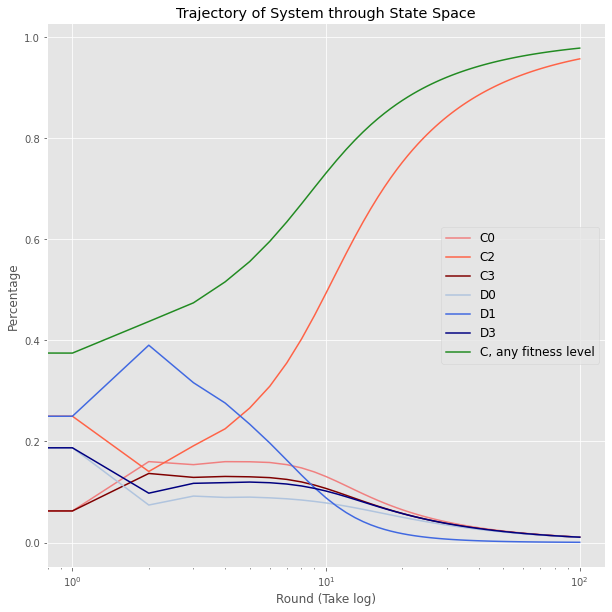

In [155]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(10, 10))
colors = ['lightcoral', 'tomato', 'maroon', 'lightsteelblue', 'royalblue', 'navy', 'forestgreen']

for i in range(7):
    y = list(output.iloc[i,:])
    x = range(len(y))
    plt.plot(x, y, color = colors[i], label=output.index[i])

takeLog = True

plt.legend(loc=5, prop={'size': 12})
if takeLog:
    plt.xscale('log')
    plt.xlabel('Round (Take log)')
else: 
    plt.xlabel('Round')
plt.ylabel('Percentage')
plt.title('Trajectory of System through State Space')
plt.show()

### Tabel 3. Three Initial States and Corresponding Attractor (p. 336)

In [124]:
# *********************************************************************************************** #
# ************************** Running This Cell is Very Time Consuming! ************************** #
# *********************************************************************************************** #

def get_result_after_specified_rounds(initial_propotion, round_num, percision=1000):
    getcontext().prec = percision
    
    categories = ['C0', 'C2', 'C3', 'D0', 'D1', 'D3']
    output = pd.DataFrame({'Behavior-Fitness Category': categories, 
                           'Initial State (t = 0)': [float(p) for p in initial_propotion]})
    
    propotions = [Decimal(p) for p in initial_propotion]
    print(round_num, ":", sep = "", end = " ")
    for r in range(round_num):
        propotions = one_round(propotions)
        if r % 1000 == 0:
            print(r, end = "...")
    print("")
    
    output = output.join(pd.DataFrame({'State Close to Attractor Occupied by Indicated Time': [float(p) for p in propotions]}))
    output.set_index('Behavior-Fitness Category', inplace=True)
    return output

pd.set_option('display.float_format', lambda x: ('%.10f' % x))

propotions1 = ['0.25', '0.25', '0.00', '0.00', '0.25', '0.25']
output1 = get_result_after_specified_rounds(propotions1, 8955, 5000)

propotions2 = ['0.09', '0.01', '0.00', '0.00', '0.81', '0.09']
output2 = get_result_after_specified_rounds(propotions2, 9022, 5000)

propotions3 = ['0.01', '0.00', '0.00', '0.00', '0.00', '0.99']
output3 = get_result_after_specified_rounds(propotions3, 99579, 30000)

display(output1, output2, output3)

8955: 0...1000...2000...3000...4000...5000...6000...7000...8000...
9022: 0...1000...2000...3000...4000...5000...6000...7000...8000...9000...
99579: 0...1000...2000...3000...4000...5000...6000...7000...8000...9000...10000...11000...12000...13000...14000...15000...16000...17000...18000...19000...20000...21000...22000...23000...24000...25000...26000...27000...28000...29000...30000...31000...32000...33000...34000...35000...36000...37000...38000...39000...40000...41000...42000...43000...44000...45000...46000...47000...48000...49000...50000...51000...52000...53000...54000...55000...56000...57000...58000...59000...60000...61000...62000...63000...64000...65000...66000...67000...68000...69000...70000...71000...72000...73000...74000...75000...76000...77000...78000...79000...80000...81000...82000...83000...84000...85000...86000...87000...88000...89000...90000...91000...92000...93000...94000...95000...96000...97000...98000...99000...


,Initial State (t = 0),State Close to Attractor Occupied by Indicated Time
Behavior-Fitness Category,,
C0,0.25,0.0001118158
C2,0.25,0.9995527867
C3,0.00,0.0001117908
D0,0.00,0.0001117658
D1,0.25,0.0000000500
D3,0.25,0.0001117908


,Initial State (t = 0),State Close to Attractor Occupied by Indicated Time
Behavior-Fitness Category,,
C0,0.09,0.0001118136
C2,0.01,0.9995527958
C3,0.00,0.0001117886
D0,0.00,0.0001117636
D1,0.81,0.0000000500
D3,0.09,0.0001117886


,Initial State (t = 0),State Close to Attractor Occupied by Indicated Time
Behavior-Fitness Category,,
C0,0.01,0.0000111804
C2,0.00,0.9999552790
C3,0.00,0.0000111801
D0,0.00,0.0000111799
D1,0.00,0.0000000005
D3,0.99,0.0000111801


### 延伸
Notes
- 解析解

To-Does
- [ ] 畫圖等視覺化
- [ ] 設計不同的 payoff matrix，看結果會如何?
- [ ] 其他作者提到的未來研究可延伸之處？
- [ ] ~~Agent-based version~~

Ｑuestiones
- [x] "close" to state? 設定 round 數量看結果是否相同即可？還是自己要設定 threshold 來 loop? -> 這樣可以

### Randomly select 100 initial condition

### Obsever-play model

### Play-compare model